# Задание 1

Считать граф. Визуализировать. Заменить все ребра между нодами с чётной степенью на путь длиной 2. Визуализировать, закрепив позиции узлов из первой визуализации.

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
G = nx.read_edgelist('internet-industry-partnerships.edges', delimiter=',')
print(G)

Graph with 219 nodes and 630 edges


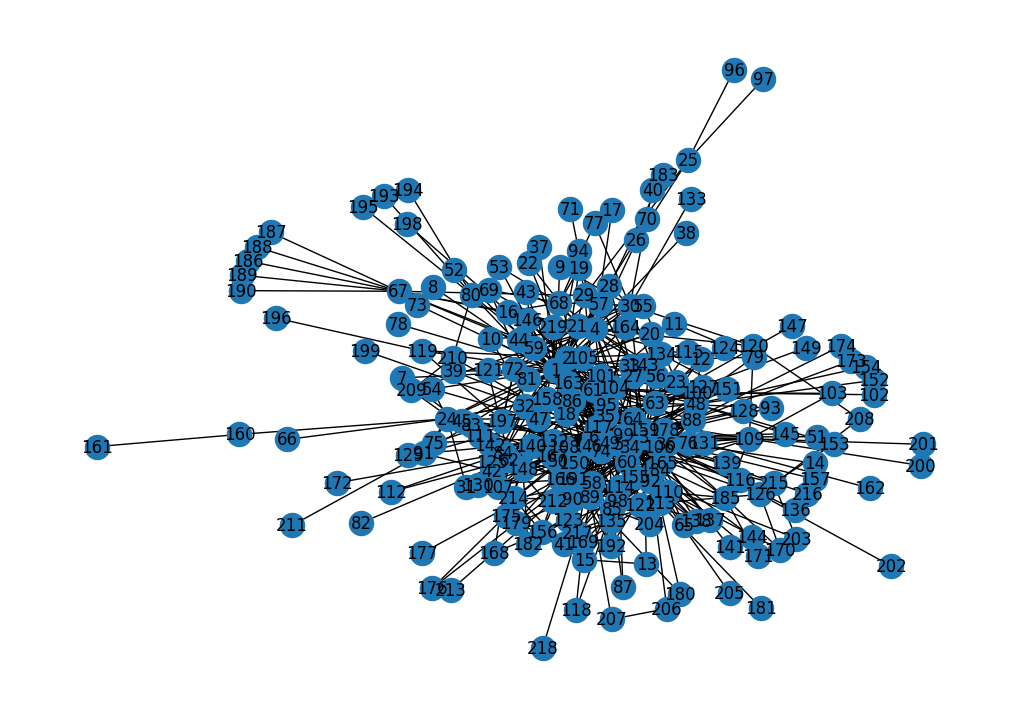

In [ ]:
 fig = plt.figure(figsize=(10,7))
 pos = nx.spring_layout(G)
 nx.draw(G,with_labels = True)

In [ ]:
countn = len(G.nodes)
for u, v in list(G.edges):
    if (G.degree[u] % 2 == 0) and (G.degree[v] % 2 == 0):

        G.remove_edge(u, v)
        G.add_edge(u, countn)
        G.add_edge(countn, v)
        pos[countn] = [pos[u][0], pos[v][1]]
        countn += 1

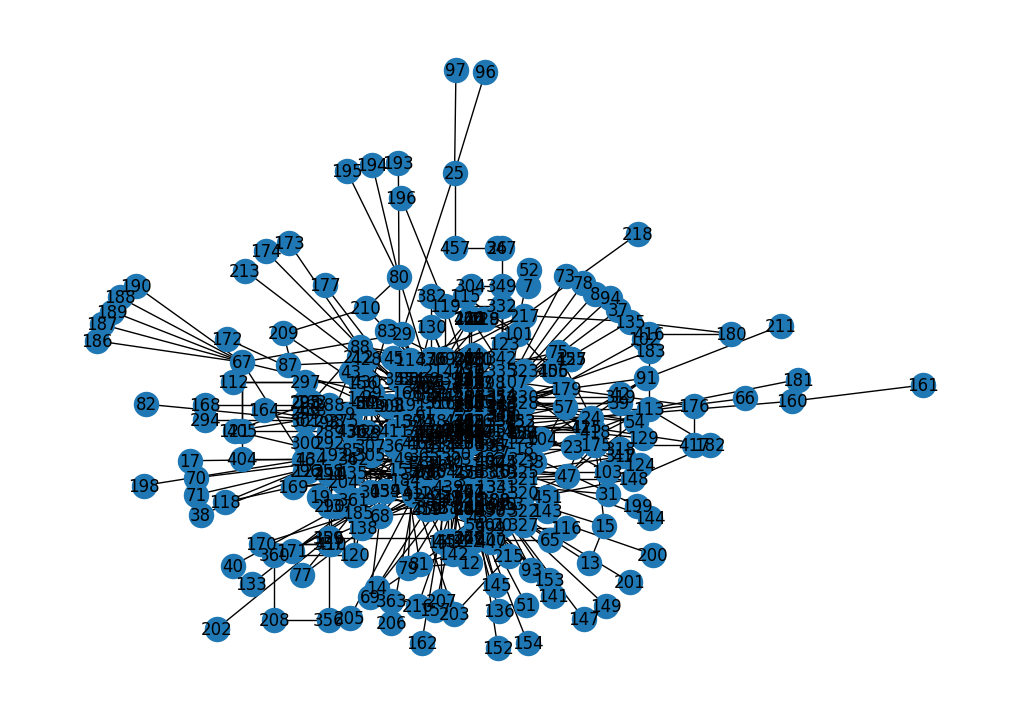

In [ ]:
fig = plt.figure(figsize=(10, 7))
nx.draw(G, pos=pos,with_labels = True)
plt.show()

# Задание 2

Для графа из первого задания рассчитать разбиения с помощью Girvan–Newman algorithm. Выбрать 5 лучших разбиений с помощью меры модулярность. Среди этих 5 разбиений выделить разбиение с минимальным количеством сообществ.

In [ ]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity
import numpy as np
import random

In [ ]:
G = nx.read_edgelist('internet-industry-partnerships.edges',delimiter=',')
print(G)

Graph with 219 nodes and 630 edges


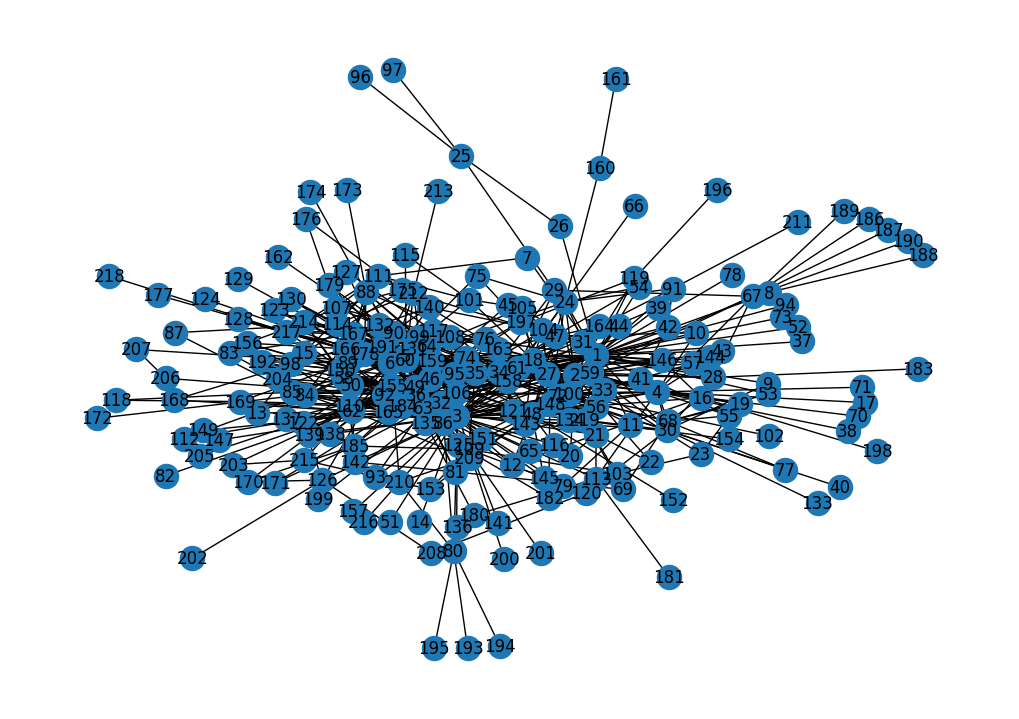

In [ ]:
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(10,7))
nx.draw(G,pos=pos,with_labels=True)

In [ ]:
comm = list(girvan_newman(G))
print(len(comm))

218


In [ ]:
comms_with_modularity = []     # [[index, modularity, length(comm)], ...]

for idx, com in enumerate(comm):
    comms_with_modularity.append([idx, modularity(G, com), len(com)])

top_five_by_modularity = sorted(comms_with_modularity, key=lambda x: x[1], reverse=True)[:5]
result_community = sorted(top_five_by_modularity, key=lambda x: x[2])[0]
result_community

[16, 0.3353199798437893, 18]

In [ ]:
top_five_by_modularity

[[16, 0.3353199798437893, 18],
 [17, 0.33450995212899964, 19],
 [18, 0.3336986646510454, 20],
 [19, 0.3328861174099268, 21],
 [20, 0.33207231040564356, 22]]

In [ ]:
best_comm = comm[result_community[0]]
colors = [0] * len(G)
color_by_comm = np.random.uniform(0, 1, size=(len(best_comm),))
for idx, subcomm in enumerate(best_comm):
    for node in subcomm:
        colors[int(node)-1] = color_by_comm[idx]

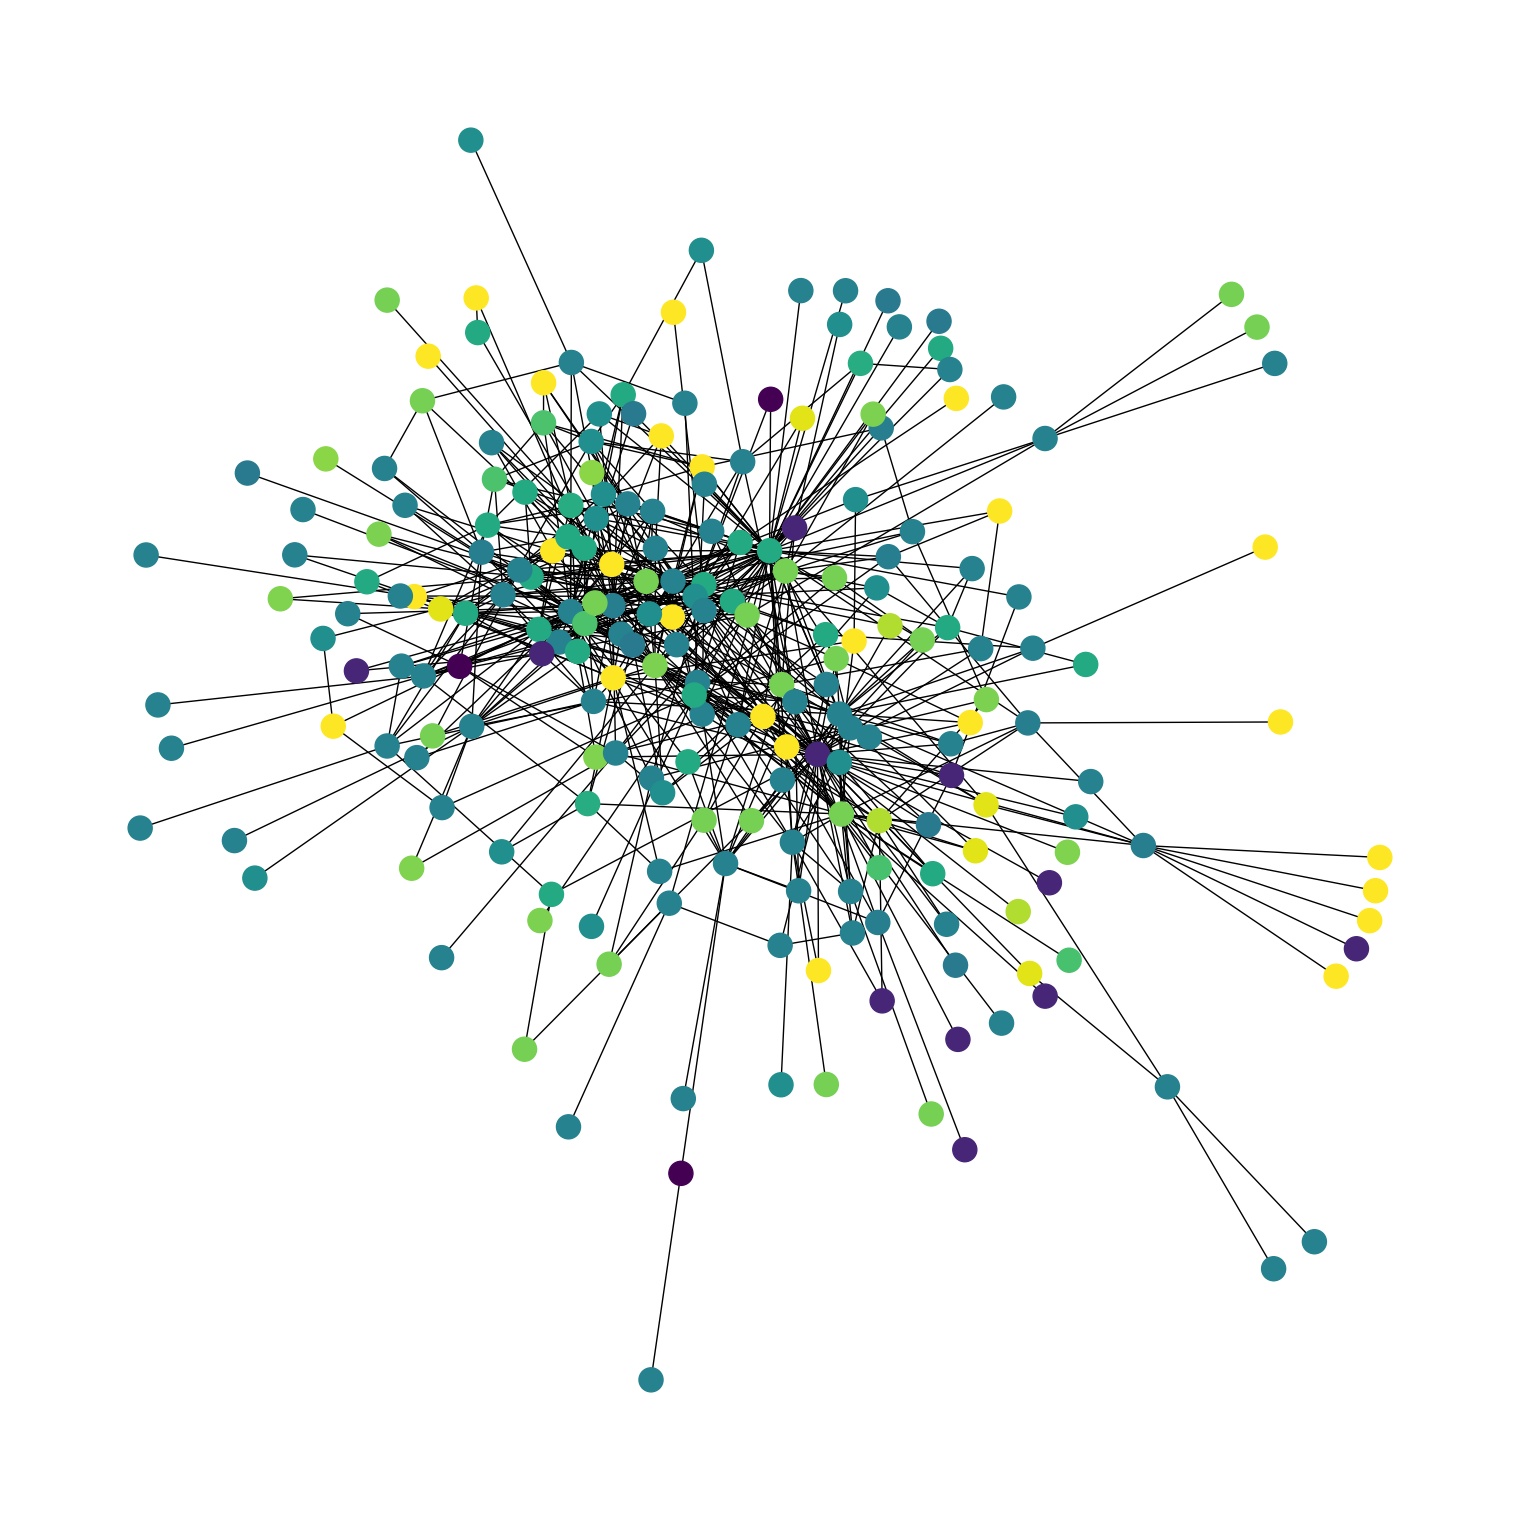

In [ ]:
fig = plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos, node_color=colors)
plt.show()

In [ ]:
def color_map(g, comm):
    colors = [0] * len(g)
    color_by_comm = np.random.uniform(0, 1, size=(len(comm),))
    for idx, subcomm in enumerate(comm):
        for node in subcomm:
            colors[int(node)-1] = color_by_comm[idx]
    return colors

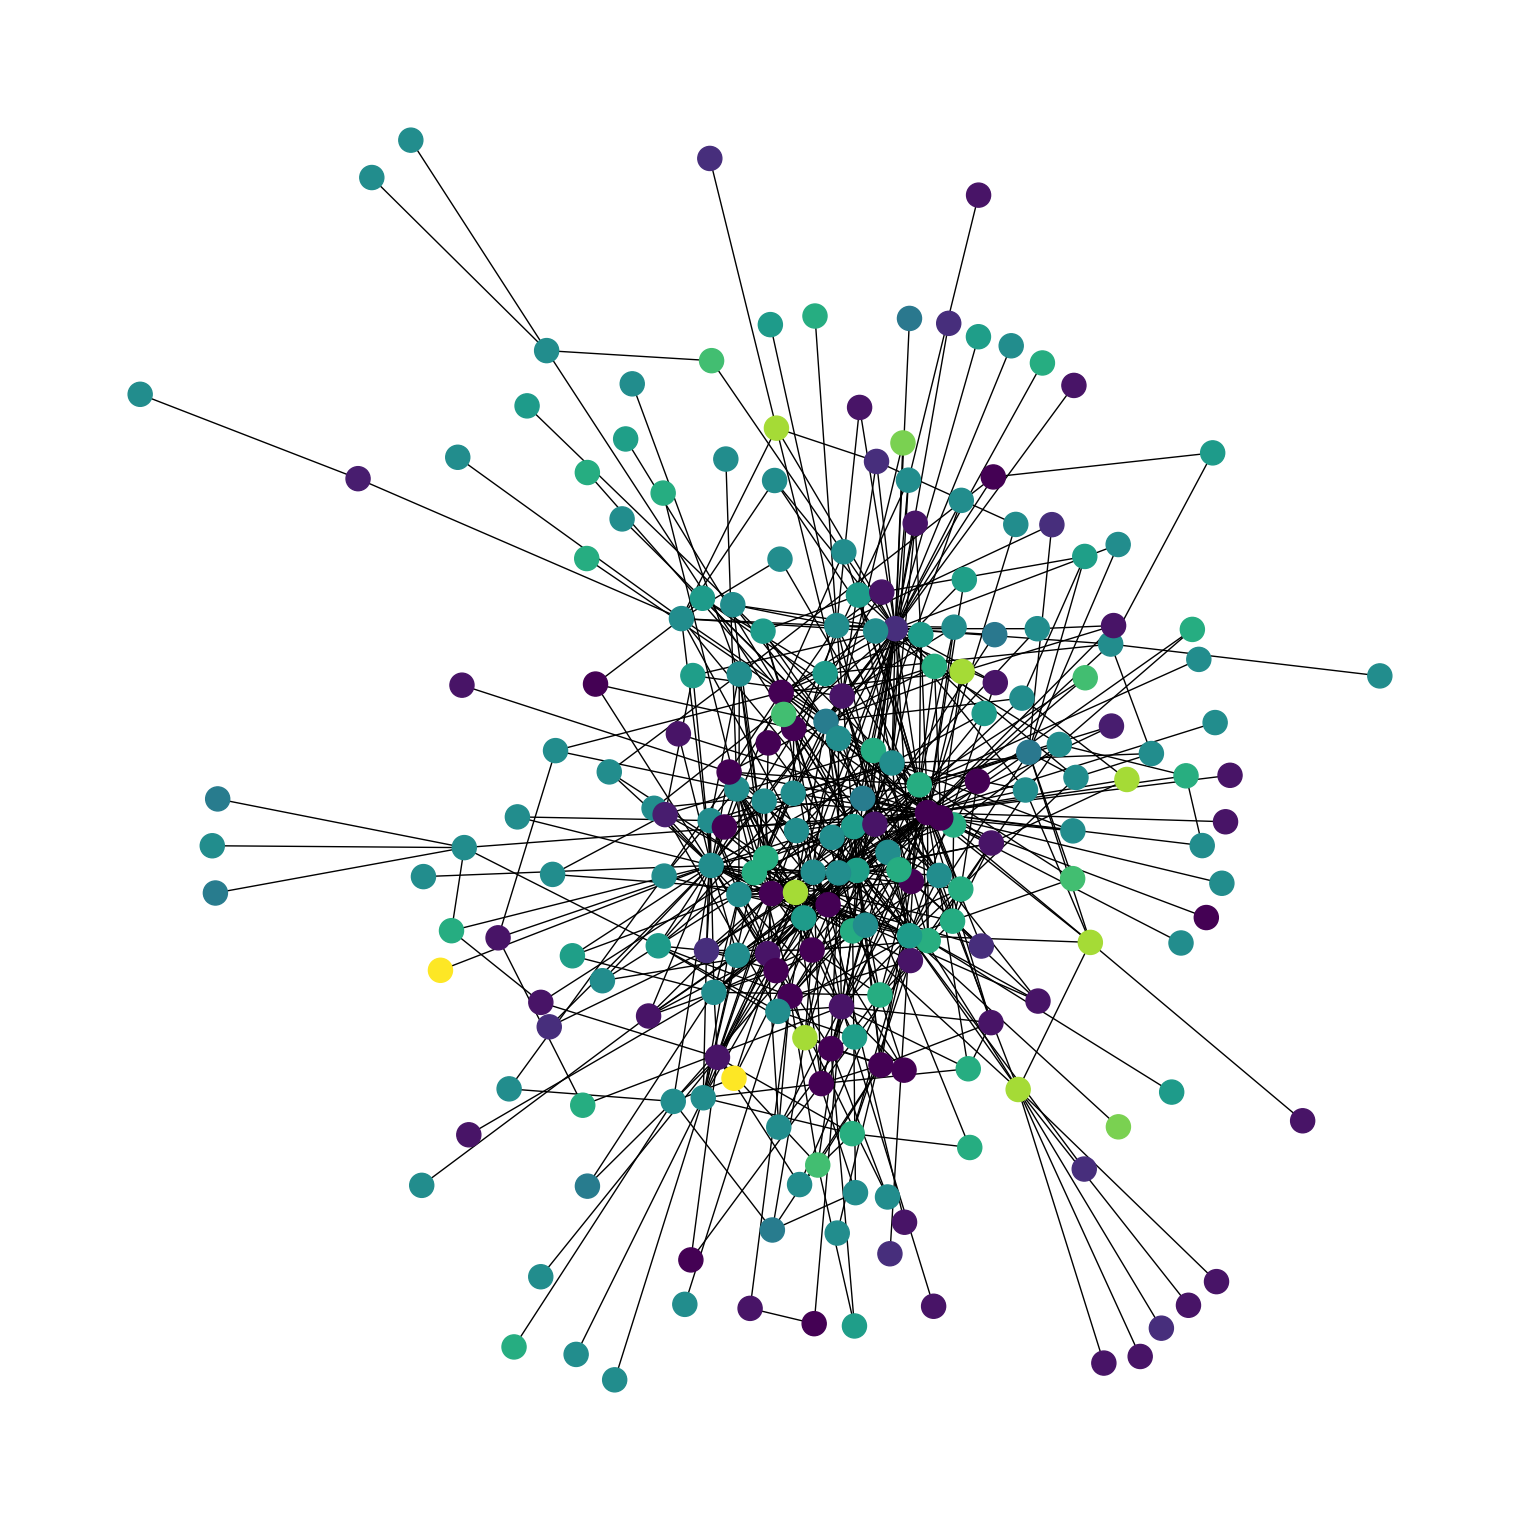

In [ ]:
best_comm = communities[result_community[0]]
fig = plt.figure(figsize=(15, 15))
nx.draw(G, pos=pos, node_color=color_map(G, best_comm))
plt.show()

# Задание 3

Сделать рандомно второй граф, основываясь на значениях степеней вершин первого графа

219

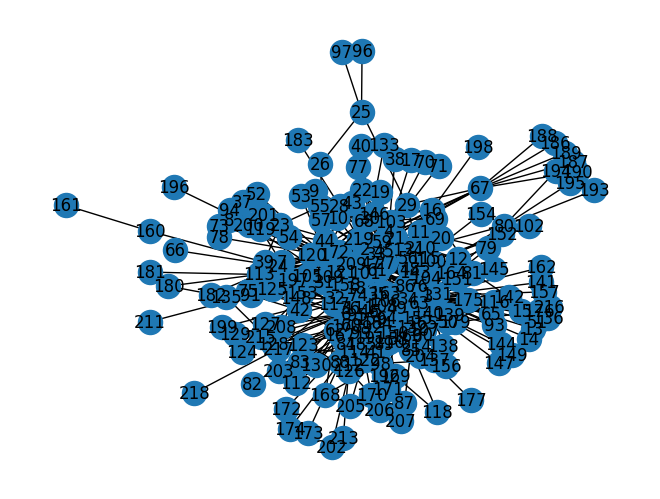

In [ ]:
G = nx.read_edgelist('internet-industry-partnerships.edges', delimiter = ',')
pos = nx.spring_layout(G)
nx.draw(G, pos = pos, with_labels = True)
G.number_of_nodes()

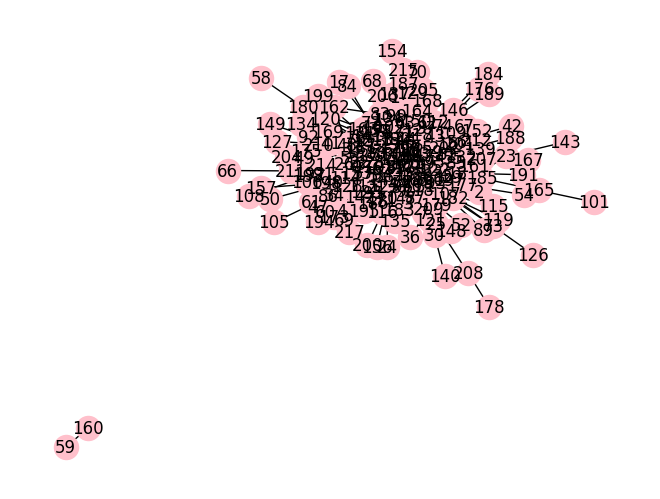

In [ ]:
degrees = [d for v, d in G.degree]
H = nx.configuration_model(degrees)
#H = nx.Graph(H)
pos = nx.spring_layout(H)

nx.draw(H, pos = pos, with_labels = True, node_color = 'pink')

In [ ]:
H.number_of_nodes()

219

In [ ]:
degrees2 = [k for u, k in H.degree]

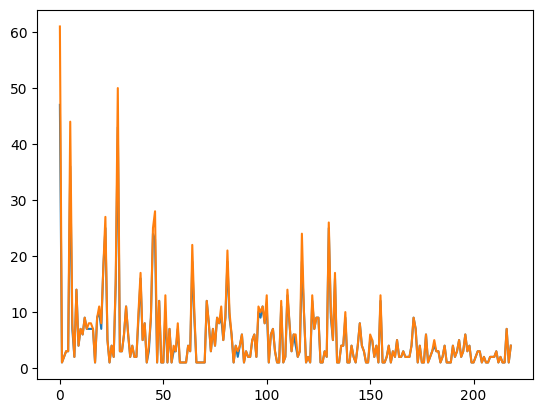

In [ ]:
plt.plot(degrees2)
plt.plot(degrees)

In [ ]:
degrees == degrees2

False

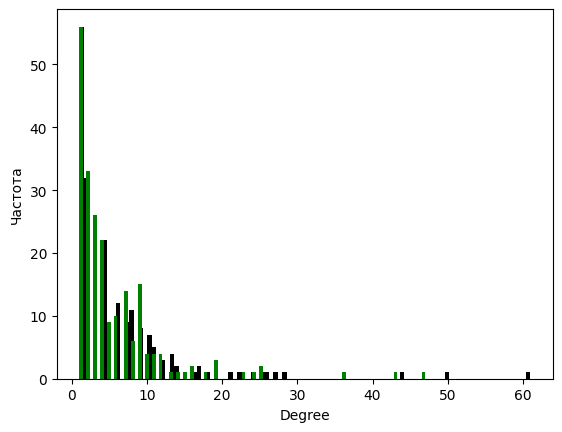

In [ ]:
plt.hist(degrees, bins=100, color='black')
plt.hist(degrees2, bins=100, color='green')
plt.xlabel('Degree')
plt.ylabel('Частота')
plt.show()